In [1]:
import os
import numpy as np

from surforama.io.star import load_points_layer_data_from_star_file
from surforama.io.mesh import read_obj_file

from surforama.utils.stats import (
    compute_geod_distance_matrix,
    compute_surface_occupancy,
    orientations_of_knn_inplane
)

In [4]:
example_usecase_dir = "../../example_usecase/"
star_files = [
    "M2.star",
    "M3b.star",
    "M3c.star",
    "M4b.star",
    "M5c.star"
]

mesh_files = [
    "Tomo1L1_M2.obj",
    "Tomo1L1_M3b.obj",
    "Tomo1L1_M3c.obj",
    "Tomo1L1_M4b.obj",
    "Tomo1L1_M5c.obj",
]

star_files = [os.path.join(example_usecase_dir, f) for f in star_files]
mesh_files = [os.path.join(example_usecase_dir, f) for f in mesh_files]

In [5]:
method = "fast" # "exact" or "fast"
nn_dists = []
surface_occupancies = []
knn_orientations = []
for star_file, mesh_file in zip(star_files, mesh_files):
    print(f"Computing stats for {star_file} and {mesh_file}.")
    
    # Load data
    point_coordinates, feature_table = load_points_layer_data_from_star_file(star_file)
    verts, faces, _ = read_obj_file(mesh_file)

    # Compute nearest neighbor distances
    geod_distance_matrix = compute_geod_distance_matrix(verts, faces, point_coordinates, method=method)
    nn_dists.append(np.min(geod_distance_matrix, axis=1))

    # Compute orientations of k-nearest neighbors
    knn_orientations.append(orientations_of_knn_inplane(geod_distance_matrix, feature_table, k=2, c2_symmetry=True))

    # Compute surface occupancy
    surface_occ = compute_surface_occupancy(verts, faces, point_coordinates, only_front=True)
    surface_occupancies.append(surface_occ)

Computing stats for ../../example_usecase/M2.star and ../../example_usecase/Tomo1L1_M2.obj.
Computing stats for ../../example_usecase/M3b.star and ../../example_usecase/Tomo1L1_M3b.obj.
Computing stats for ../../example_usecase/M3c.star and ../../example_usecase/Tomo1L1_M3c.obj.
Computing stats for ../../example_usecase/M4b.star and ../../example_usecase/Tomo1L1_M4b.obj.
Computing stats for ../../example_usecase/M5c.star and ../../example_usecase/Tomo1L1_M5c.obj.


In [6]:
from matplotlib import pyplot as plt

def plot_nn_distances(nn_dists):
    bins = np.linspace(5, 20, 15)
    plt.figure(figsize=(20, 5))
    for i, nn_dist in enumerate(nn_dists):
        plt.subplot(1, len(nn_dists), i+1)
        plt.hist(nn_dist, bins=bins)
        plt.xlabel("Nearest neighbor distance")
        plt.ylabel("Count")
    plt.legend()
    plt.suptitle("Nearest neighbor distances")
    plt.tight_layout()
    plt.show()

def plot_surface_occupancies(surface_occupancies):
    plt.figure()
    plt.title("Surface Occupancies")
    plt.bar(np.arange(len(surface_occupancies)), surface_occupancies)
    plt.xlabel("Sample")
    plt.ylabel("Surface Occupancy")
    plt.tight_layout()
    plt.show()


def plot_knn_orientations(knn_orientations):
    bins = np.linspace(0., 90., 15)
    
    ax = plt.figure(figsize=(20, 5))
    for i, orientations in enumerate(knn_orientations):
        plt.subplot(1, len(knn_orientations), i+1)
        plt.hist(orientations, bins=bins, label=[f"{i+1}-NN" for i in range(orientations.shape[1])])
        plt.xlabel("Orientation (degrees)")
        plt.ylabel("Count")
    plt.legend()
    plt.suptitle("Orientations of k-nearest neighbors")
    plt.tight_layout()
    plt.show()

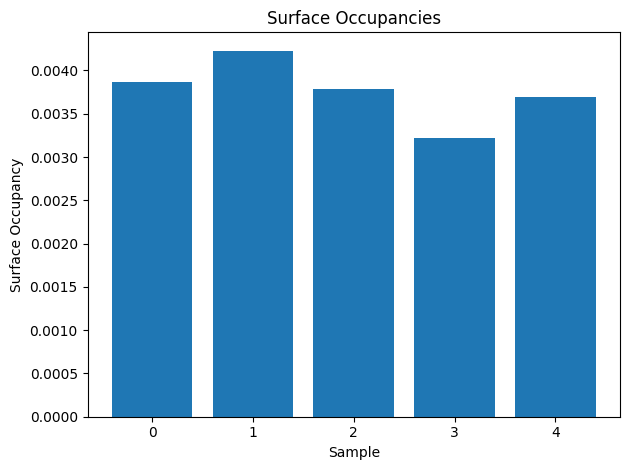

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


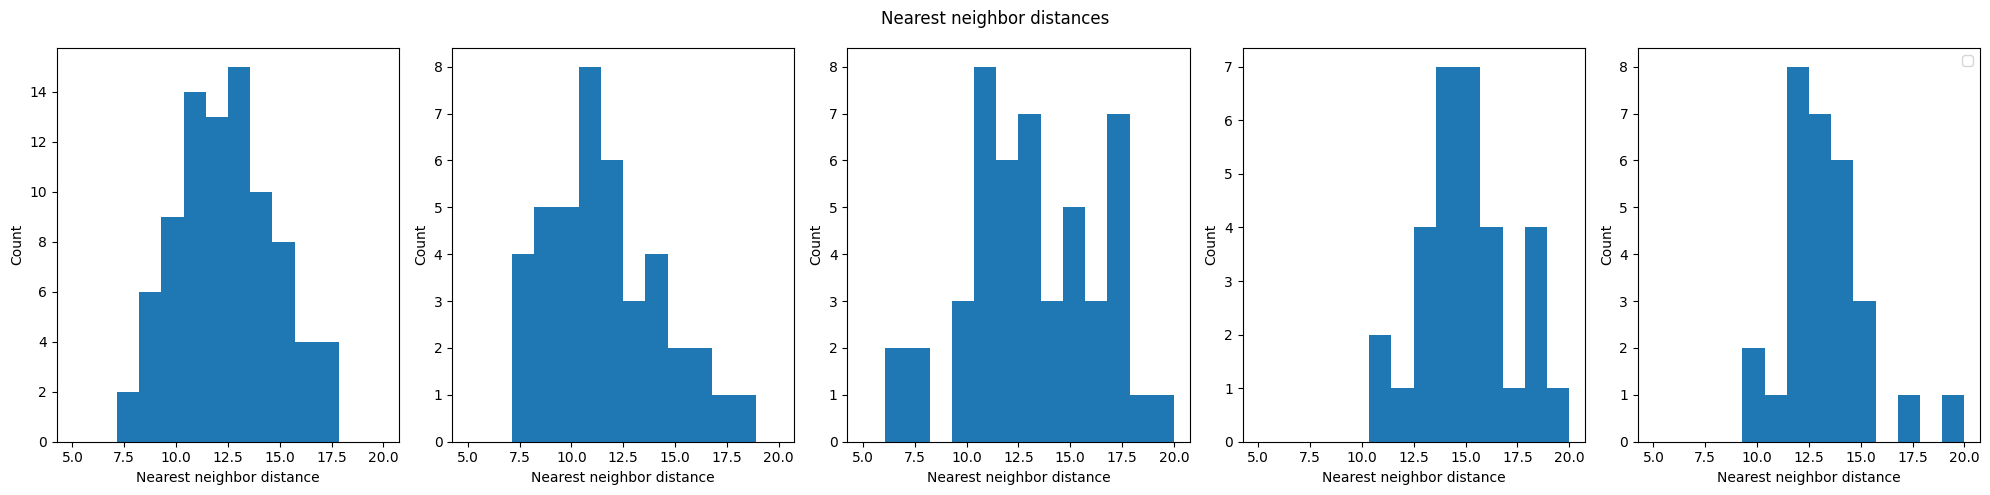

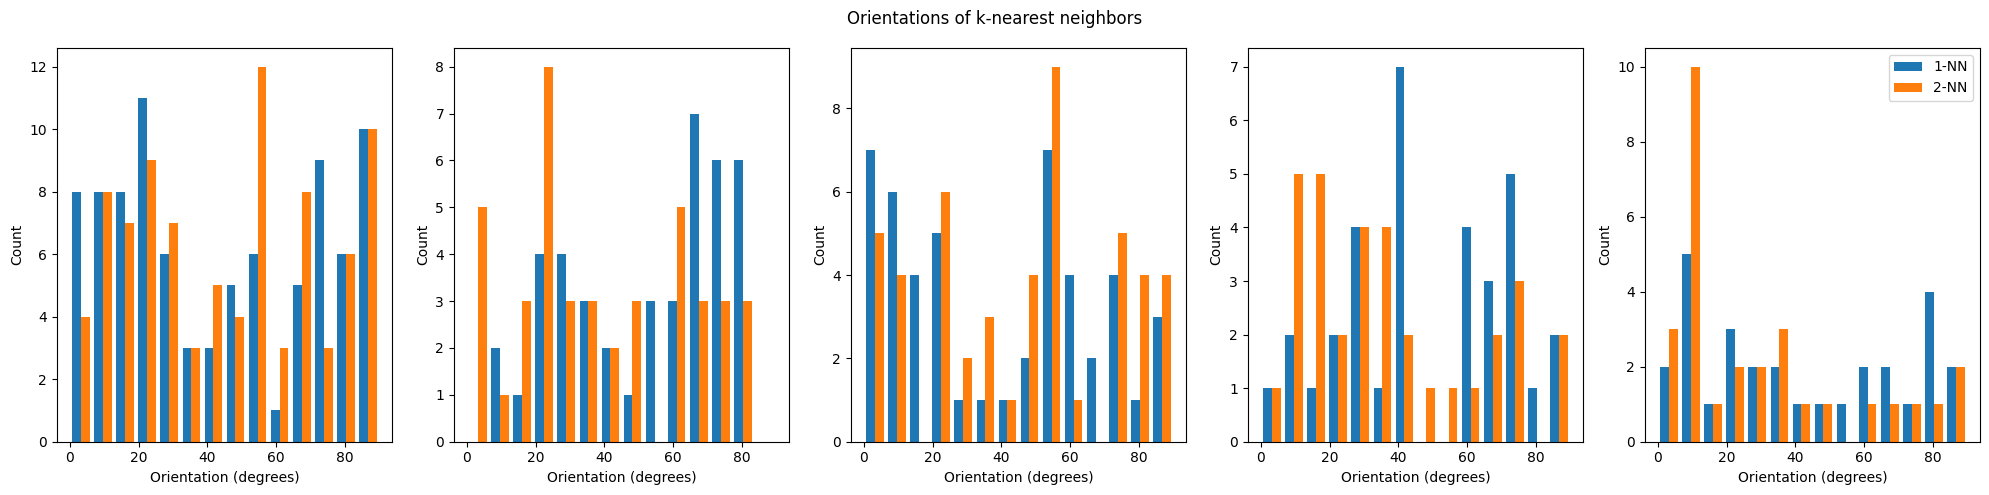

In [7]:
plot_surface_occupancies(surface_occupancies)
plot_nn_distances(nn_dists)
plot_knn_orientations(knn_orientations)